<a href="https://colab.research.google.com/github/nikhita0304/Main-FLow/blob/main/internship_task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Study Hours     30 non-null     int64
 1   Attendance (%)  30 non-null     int64
 2   Pass            30 non-null     int64
dtypes: int64(3)
memory usage: 852.0 bytes
Training samples: 24, Testing Samples 6
Model Accuracy: 1.00

Confusion Matrix:
[[5 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



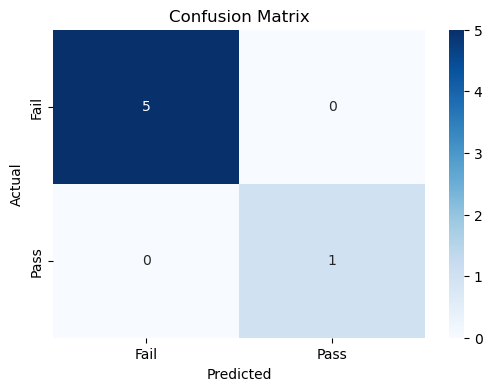

In [ ]:
# Task 1: Student Pass/Fail Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('student_performance_dataset.csv')
df.head()
df.isnull().sum()

print("\nDataset Information")
df.info()

# Features (X) and target variable (y)
X = df[['Study Hours', 'Attendance (%)']]
y = df['Pass']

# splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)
print(f'Training samples: {X_train.shape[0]}, Testing Samples {X_test.shape[0]}')

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
plt.figure(figsize = (6, 4))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = ['Fail', 'Pass'], yticklabels = ['Fail', 'Pass'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\selen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First 5 rows of dataset
                                         Review Text Sentiment
0                  The product quality is excellent!  positive
1      Worst customer service I've ever experienced.  negative
2                   Very satisfied with my purchase.  positive
3                               Not worth the money.  negative
4  Delivery was quick and the item was well-packa...  positive

 Missing Values
Review Text    0
Sentiment      0
dtype: int64

Preprocessed Data:
                                         Review Text  \
0                  The product quality is excellent!   
1      Worst customer service I've ever experienced.   
2                   Very satisfied with my purchase.   
3                               Not worth the money.   
4  Delivery was quick and the item was well-packa...   

                            Cleaned_Review  
0                product quality excellent  
1  worst customer service ever experienced  
2                       satisfied purchase

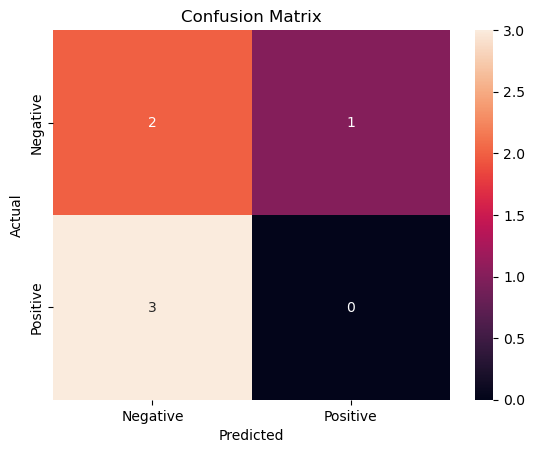

In [ ]:
# Task-2
# Sentiment Analysis with Natural Language Processing
import nltk
nltk.download('stopwords')

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# load the dataset
data = pd.read_csv('reviews_sample.csv')

print("First 5 rows of dataset")
print(data.head())
print("\n Missing Values")
print(data.isnull().sum())
stop_words = set(stopwords.words('english'))

if data['Sentiment'].dtype =='object':
    data['Sentiment'] = data['Sentiment'].str.lower().map({'positive': 1, 'negative': 0})


def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)         # Remove non-word characters
    text = text.lower()                     # Convert to lowercase
    words = text.split()                    # Split into words
    words = [word for word in words if word not in stop_words]  # Remove stopwords & stem
    return ' '.join(words)

# Apply preprocession
data ['Cleaned_Review'] = data['Review Text'].apply(preprocess_text)
print("\nPreprocessed Data:")
print(data[['Review Text', 'Cleaned_Review']].head())

# Convert texxt to numerical format using TF-idf
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['Cleaned_Review']).toarray()
y = data['Sentiment']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)
print(f"\nTraining samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
